In [99]:
from pathlib import Path

data_path = Path('data/')
img_path  = data_path / 'faces'

In [100]:
import os

def walk_through(dir_path):
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f'there are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

In [101]:
walk_through(data_path)

there are 1 directories and 0 images in data
there are 2 directories and 0 images in data/faces
there are 1 directories and 0 images in data/faces/test
there are 0 directories and 20 images in data/faces/test/sudeep
there are 1 directories and 0 images in data/faces/train
there are 0 directories and 80 images in data/faces/train/sudeep


In [102]:
train_dir = img_path / 'train'
test_dir = img_path / 'test'
train_dir,test_dir

(PosixPath('data/faces/train'), PosixPath('data/faces/test'))

data/faces/train/sudeep/sudeep_66e4276b-f417-4721-8fff-4a4a82a96755.jpg
sudeep
random image path : data/faces/train/sudeep/sudeep_66e4276b-f417-4721-8fff-4a4a82a96755.jpg
image class : sudeep
image height : 720
image width : 1280


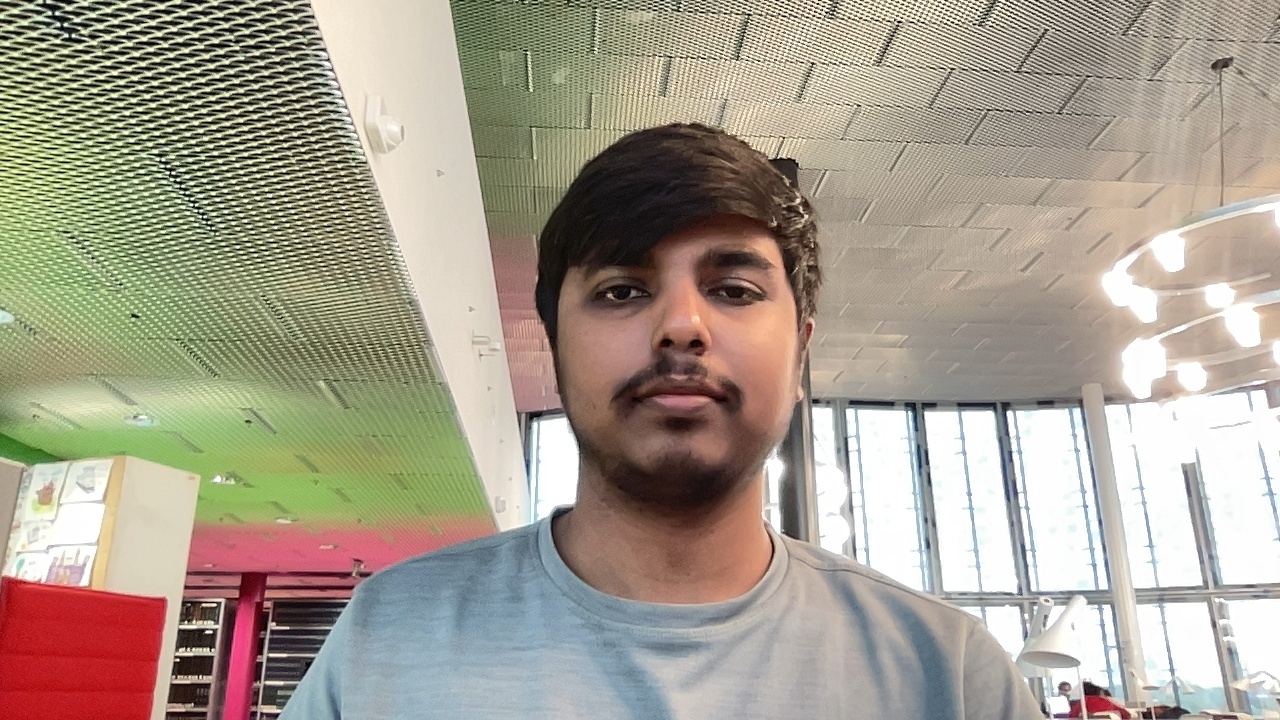

In [103]:
import random
from PIL import Image



img_path_list = list(img_path.glob('*/*/*.jpg'))

random_image_path = random.choice(img_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f'random image path : {random_image_path}')
print(f'image class : {image_class}')
print(f'image height : {img.height}')
print(f'image width : {img.width}')
img



(-0.5, 1279.5, 719.5, -0.5)

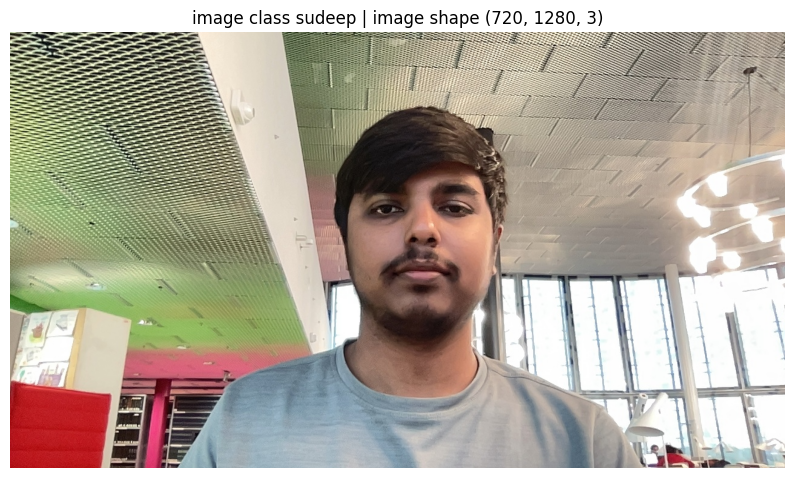

In [104]:
import numpy as np
import matplotlib.pyplot as plt

img_to_array = np.array(img)

plt.figure(figsize=(10,7))
plt.imshow(img_to_array)
plt.title(f'image class {image_class} | image shape {img_to_array.shape}')
plt.axis(False)

In [105]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

In [106]:
data_transform = transforms.Compose([
    transforms.Resize(size=(140,256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [107]:
data_transform(img).shape

torch.Size([3, 140, 256])

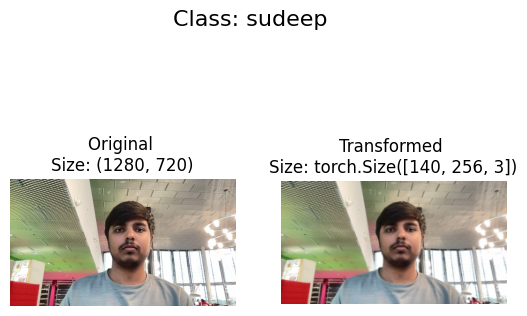

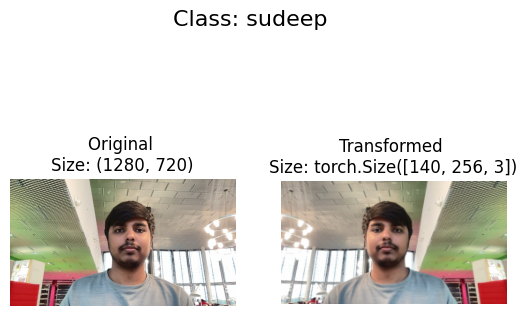

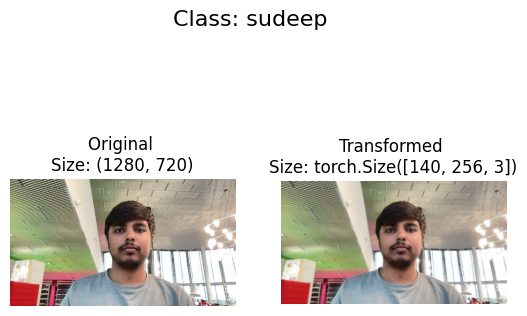

In [108]:

def plot_transformed_images(image_paths, transform, n=3):

    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(img_path_list,
                        transform=data_transform,
                        n=3)
            

In [109]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 )

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 80
     Root location: data/faces/train
     StandardTransform
 Transform: Compose(
                Resize(size=(140, 256), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 20
     Root location: data/faces/test
     StandardTransform
 Transform: Compose(
                Resize(size=(140, 256), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [110]:
class_name = train_data.classes
class_name

['sudeep']

In [111]:
class_dict = train_data.class_to_idx
class_dict

{'sudeep': 0}

In [112]:

img, label = train_data[0][0], train_data[0][1]
# print(f'image tensor: \n{img}')
print(f'image shape: \n{img.shape}')
print(f'image datatype: \n{img.dtype}')
print(f'image label: \n{label}')
print(f'image datatype : \n{type(label)}')

image shape: 
torch.Size([3, 140, 256])
image datatype: 
torch.float32
image label: 
0
image datatype : 
<class 'int'>


Original shape: torch.Size([3, 140, 256])
permuted shape: torch.Size([140, 256, 3])


Text(0.5, 1.0, 'sudeep')

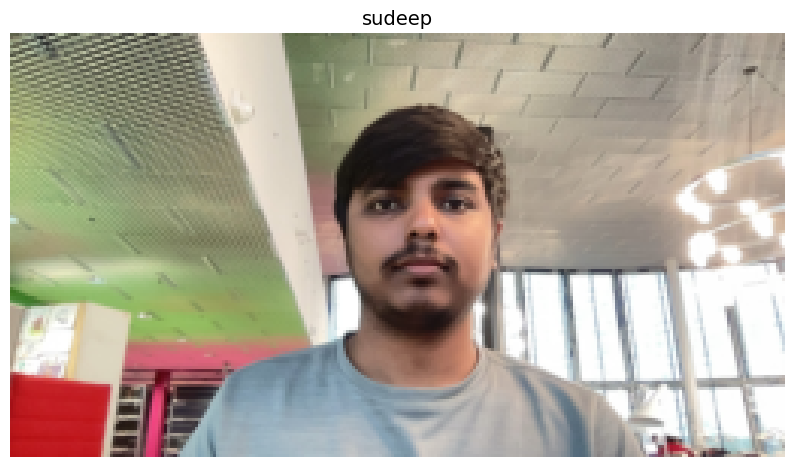

In [113]:
img_permute = img.permute(1,2,0)

print(f'Original shape: {img.shape}')
print(f'permuted shape: {img_permute.shape}')

plt.figure(figsize=(10, 7))
plt.imshow(img_permute, cmap='gray')
plt.axis(False)
plt.title(class_name[label], fontsize=14)

In [114]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,  # how many samples per batch?
                              # how many subprocesses to use for data loading? (higher = more)
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

In [115]:

img, label = next(iter(train_dataloader))
print(f'image shape: {img.shape}')
print(f'label shape: {label.shape}')

image shape: torch.Size([1, 3, 140, 256])
label shape: torch.Size([1])


In [116]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'